In [2]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import plotly.graph_objects as go
from datetime import datetime

In [3]:
# Assuming your data is already loaded into df and cleaned
# Load CSV file, skip the header, and manually assign column names
df = pd.read_csv("../source_coin_data/coinbaseUSD_1-min_data.csv", header=0)
df = df[-100000:]
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
df = df.drop(['Symbol', 'Unix Timestamp'], axis=1)
df.rename(columns={
    "Open":"open",
    "High":"high",
    "Low":"low",
    "Close":"close",
    "Volume":"volume"
}, inplace=True)

In [4]:
df.head()

,open,high,low,close,volume
Date,,,,,
2024-05-21 06:21:00+00:00,71089.71,71153.75,71089.71,71153.75,4.900671
2024-05-21 06:22:00+00:00,71153.75,71192.19,71152.42,71192.18,4.749921
2024-05-21 06:23:00+00:00,71192.19,71242.46,71189.27,71193.15,11.620343
2024-05-21 06:24:00+00:00,71193.66,71202.80,71138.44,71183.10,8.889186
2024-05-21 06:25:00+00:00,71183.09,71209.05,71170.96,71197.70,6.446220


In [5]:
df.describe()

,open,high,low,close,volume
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,64952.270967,64975.377652,64929.336323,64952.361093,6.981325
std,4190.893900,4188.487790,4193.058569,4190.869781,12.866107
min,53785.930000,53936.470000,53499.900000,53785.920000,0.002111
25%,61627.920000,61648.175000,61605.777500,61628.417500,1.402269
50%,66141.570000,66155.930000,66127.680000,66141.710000,3.282211
75%,68154.605000,68180.850000,68129.657500,68154.627500,7.659579
max,71924.930000,71974.040000,71900.900000,71920.020000,646.158688


In [6]:
!pip install seaborn

            open      high       low     close    volume
open    1.000000  0.999975  0.999971  0.999956 -0.067139
high    0.999975  1.000000  0.999955  0.999977 -0.064231
low     0.999971  0.999955  1.000000  0.999976 -0.070841
close   0.999956  0.999977  0.999976  1.000000 -0.067528
volume -0.067139 -0.064231 -0.070841 -0.067528  1.000000


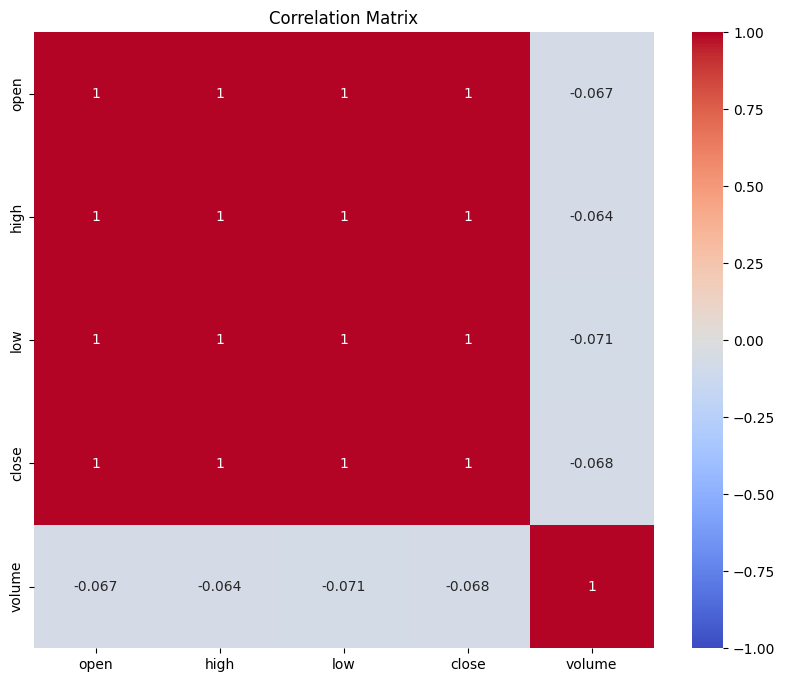

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')  # or however you load your data

# Calculate the correlation matrix
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume']].corr()

print(correlation_matrix)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# Ensure all numerical columns are in the correct format (float)
df['open'] = df['open'].astype(float)
df['high'] = df['high'].astype(float)
df['low'] = df['low'].astype(float)
df['close'] = df['close'].astype(float)
df['volume'] = df['volume'].astype(float)

In [9]:
# Technical indicators
df["VWAP"] = ta.vwap(df.high, df.low, df.close, df.volume)
# df['RSI'] = ta.rsi(df.close, length=16)
my_bbands = ta.bbands(df.close, length=14, std=2.0)
df = df.join(my_bbands)

# test_data = df[-55:]
# df = df[50:-55]

C:\Users\Pc\AppData\Local\Temp\ipykernel_16080\3998186655.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["VWAP"] = ta.vwap(df.high, df.low, df.close, df.volume)


                open      high       low     close    volume      VWAP  \
open        1.000000  0.999975  0.999971  0.999956 -0.067139  0.994400   
high        0.999975  1.000000  0.999955  0.999977 -0.064231  0.994402   
low         0.999971  0.999955  1.000000  0.999976 -0.070841  0.994318   
close       0.999956  0.999977  0.999976  1.000000 -0.067528  0.994364   
volume     -0.067139 -0.064231 -0.070841 -0.067528  1.000000 -0.062438   
VWAP        0.994400  0.994402  0.994318  0.994364 -0.062438  1.000000   
BBL_14_2.0  0.999726  0.999660  0.999745  0.999691 -0.074742  0.994392   
BBM_14_2.0  0.999859  0.999842  0.999826  0.999823 -0.066454  0.994670   
BBU_14_2.0  0.999686  0.999719  0.999602  0.999649 -0.058117  0.994644   
BBB_14_2.0 -0.191526 -0.188777 -0.194401 -0.191569  0.477387 -0.182343   
BBP_14_2.0  0.002361  0.004501  0.004810  0.006532 -0.016683 -0.011357   

            BBL_14_2.0  BBM_14_2.0  BBU_14_2.0  BBB_14_2.0  BBP_14_2.0  
open          0.999726    0.999859    

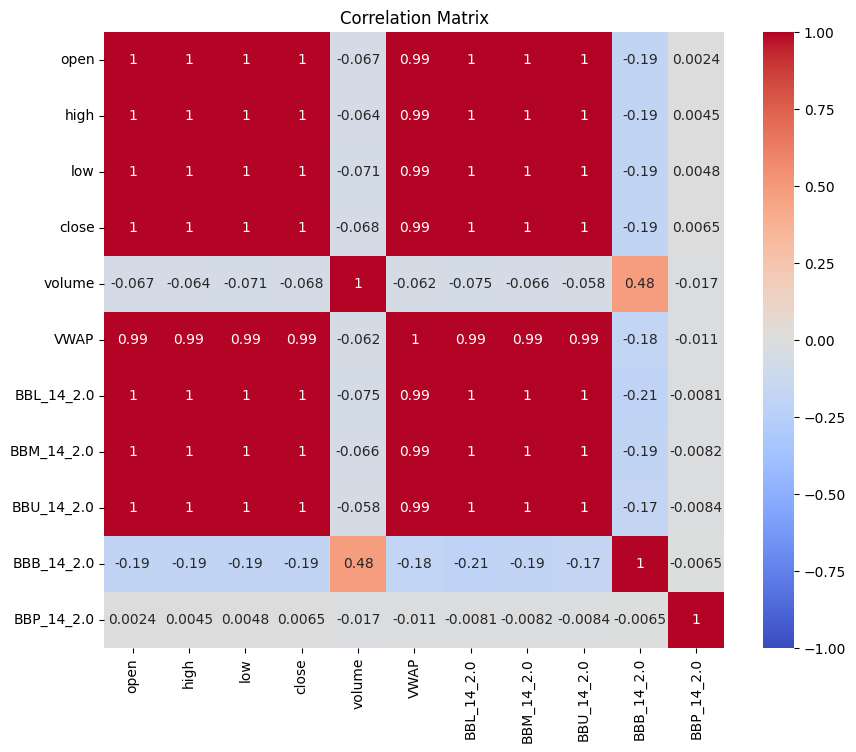

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# df = pd.read_csv('your_data.csv')  # or however you load your data

# Calculate the correlation matrix
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume', 'VWAP', 'BBL_14_2.0', 'BBM_14_2.0', 'BBU_14_2.0', 'BBB_14_2.0', 'BBP_14_2.0']].corr()

print(correlation_matrix)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [11]:
import pandas as pd
import numpy as np

def engineer_features(df):
    # Видалення високо корельованих змінних
    
    # Створення нових ознак
    df['hl_range'] = df['high'] - df['low']
    df['oc_range'] = df['open'] - df['close']
    
    # Bollinger Bands
    df['bb_width'] = (df['BBU_14_2.0'] - df['BBL_14_2.0']) / df['BBM_14_2.0']
    df['bb_position'] = (df['close'] - df['BBL_14_2.0']) / (df['BBU_14_2.0'] - df['BBL_14_2.0'])
    
    # Логарифмічні різниці
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))
    df['log_volume_change'] = np.log(df['volume'] / df['volume'].shift(1))
        
    df['close_vwap_ratio'] = df['close'] / df['VWAP'] - 1
    
    # Зміна VWAP
    df['vwap_change'] = df['VWAP'].pct_change()
                   
    # Обчислення SMA та EMA
    df['SMA_10'] = df['close'].rolling(window=7).mean()
    df['EMA_5'] = df['close'].ewm(span=4, adjust=False).mean()
    
    # Відносне положення ціни закриття між SMA та EMA
    df['close_between_ma'] = (df['close'] - df['SMA_10']) / (df['EMA_5'] - df['SMA_10'])
    
    # Різниця між EMA та SMA
    df['ema_sma_diff'] = df['EMA_5'] - df['SMA_10']
            
    # Нахил SMA та EMA
    df['sma_slope'] = (df['SMA_10'] - df['SMA_10'].shift(1)) / df['SMA_10'].shift(1)
    df['ema_slope'] = (df['EMA_5'] - df['EMA_5'].shift(1)) / df['EMA_5'].shift(1)
     
    df = df.drop(['EMA_5', 'SMA_10', 'VWAP','high', 'open', 'low', 'BBL_14_2.0', 'BBM_14_2.0', 'BBU_14_2.0', 'BBP_14_2.0', 'BBB_14_2.0'], axis=1)
    



    return df

# Використання
df_engineered = engineer_features(df)

# Перевірка нової матриці кореляцій
correlation_matrix = df_engineered.corr()
print(correlation_matrix)

                      close    volume  hl_range  oc_range  bb_width  \
close              1.000000 -0.067528 -0.113625 -0.004084 -0.191569   
volume            -0.067528  1.000000  0.696730  0.041386  0.477387   
hl_range          -0.113625  0.696730  1.000000  0.028467  0.607941   
oc_range          -0.004084  0.041386  0.028467  1.000000  0.004487   
bb_width          -0.191569  0.477387  0.607941  0.004487  1.000000   
bb_position        0.006532 -0.016683 -0.032754 -0.443971 -0.006508   
log_return         0.003776 -0.043136 -0.028910 -0.994485 -0.005835   
log_volume_change  0.000067  0.226504  0.184321  0.012567 -0.017252   
close_vwap_ratio   0.042428 -0.044975 -0.082487 -0.079778 -0.081998   
vwap_change        0.008122 -0.016637 -0.024342 -0.046404 -0.017688   
close_between_ma  -0.000488 -0.000143 -0.001495  0.002620 -0.002069   
ema_sma_diff       0.007926 -0.044678 -0.064907 -0.372245 -0.032826   
sma_slope          0.009586 -0.049604 -0.075263 -0.375891 -0.049560   
ema_sl

                      close    volume  hl_range  oc_range  bb_width  \
close              1.000000 -0.067528 -0.113625 -0.004084 -0.191569   
volume            -0.067528  1.000000  0.696730  0.041386  0.477387   
hl_range          -0.113625  0.696730  1.000000  0.028467  0.607941   
oc_range          -0.004084  0.041386  0.028467  1.000000  0.004487   
bb_width          -0.191569  0.477387  0.607941  0.004487  1.000000   
bb_position        0.006532 -0.016683 -0.032754 -0.443971 -0.006508   
log_return         0.003776 -0.043136 -0.028910 -0.994485 -0.005835   
log_volume_change  0.000067  0.226504  0.184321  0.012567 -0.017252   
close_vwap_ratio   0.042428 -0.044975 -0.082487 -0.079778 -0.081998   
vwap_change        0.008122 -0.016637 -0.024342 -0.046404 -0.017688   
close_between_ma  -0.000488 -0.000143 -0.001495  0.002620 -0.002069   
ema_sma_diff       0.007926 -0.044678 -0.064907 -0.372245 -0.032826   
sma_slope          0.009586 -0.049604 -0.075263 -0.375891 -0.049560   
ema_sl

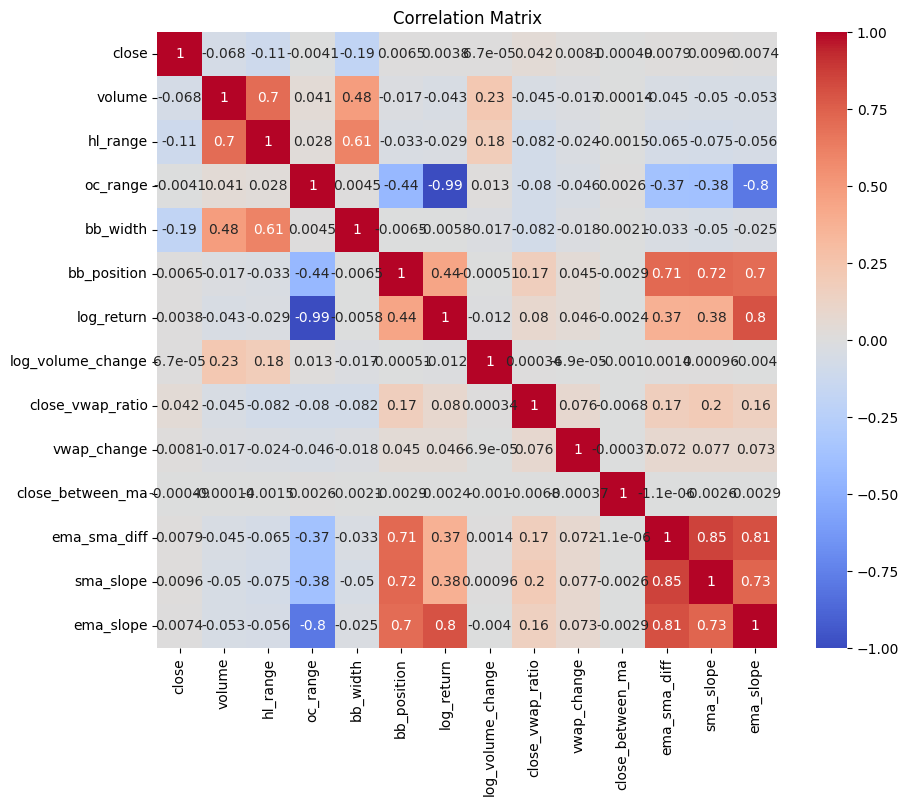

In [12]:
correlation_matrix = df_engineered[df_engineered.columns].corr()

print(correlation_matrix)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [13]:
df_engineered.describe()

,close,volume,hl_range,oc_range,bb_width,bb_position,log_return,log_volume_change,close_vwap_ratio,vwap_change,close_between_ma,ema_sma_diff,sma_slope,ema_slope
count,100000.000000,100000.000000,100000.000000,100000.000000,99987.000000,99987.000000,9.999900e+04,99999.000000,100000.000000,9.999900e+04,99994.000000,99994.000000,9.999300e+04,9.999900e+04
mean,64952.361093,6.981325,46.041329,-0.090127,0.002865,0.500508,-5.592157e-07,-0.000002,-0.000155,-3.383944e-07,1.933090,-0.059220,-5.492764e-07,-5.175565e-07
std,4190.869781,12.866107,40.200398,39.369563,0.002345,0.322908,6.179503e-04,0.961820,0.007044,2.440998e-04,149.707908,26.287658,2.292775e-04,3.055423e-04
min,53785.920000,0.002111,0.010000,-1149.320000,0.000093,-0.395720,-1.142644e-02,-6.052381,-0.039997,-2.327276e-02,-32807.943757,-385.964863,-3.879358e-03,-6.420270e-03
25%,61628.417500,1.402269,21.960000,-17.840000,0.001415,0.234855,-2.733020e-04,-0.586045,-0.003459,-4.039838e-06,1.256127,-11.638476,-1.010538e-04,-1.325111e-04
50%,66141.710000,3.282211,36.830000,-0.010000,0.002232,0.499046,0.000000e+00,-0.015842,0.000132,9.569919e-08,1.891982,0.060891,2.107438e-08,1.429723e-06
75%,68154.627500,7.659579,58.390000,17.520000,0.003557,0.768648,2.732650e-04,0.570087,0.003203,4.039177e-06,2.558602,11.935573,1.035644e-04,1.342739e-04
max,71920.020000,646.158688,1298.610000,697.820000,0.047126,1.389829,1.664077e-02,8.597238,0.046877,2.749341e-02,21563.053897,423.555820,2.871223e-03,7.168248e-03


In [14]:
# Check for NaN values in the DataFrame
nan_summary = df.isna().sum()

# Display columns with NaN values
nan_columns = nan_summary[nan_summary > 0]
print(nan_columns)


BBL_14_2.0           13
BBM_14_2.0           13
BBU_14_2.0           13
BBB_14_2.0           13
BBP_14_2.0           13
bb_width             13
bb_position          13
log_return            1
log_volume_change     1
vwap_change           1
SMA_10                6
close_between_ma      6
ema_sma_diff          6
sma_slope             7
ema_slope             1
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100000 entries, 2024-05-21 06:21:00+00:00 to 2024-07-29 18:07:00+00:00
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   open               100000 non-null  float64
 1   high               100000 non-null  float64
 2   low                100000 non-null  float64
 3   close              100000 non-null  float64
 4   volume             100000 non-null  float64
 5   VWAP               100000 non-null  float64
 6   BBL_14_2.0         99987 non-null   float64
 7   BBM_14_2.0         99987 non-null   float64
 8   BBU_14_2.0         99987 non-null   float64
 9   BBB_14_2.0         99987 non-null   float64
 10  BBP_14_2.0         99987 non-null   float64
 11  hl_range           100000 non-null  float64
 12  oc_range           100000 non-null  float64
 13  bb_width           99987 non-null   float64
 14  bb_position        99987 non-null   float64
 15  log_r

In [16]:
test_data = df_engineered[-55:]
df = df_engineered[50:-55]

In [17]:
# Check for infinite values in the DataFrame
inf_summary = df.isin([np.inf, -np.inf]).sum()

# Display columns with infinite values
inf_columns = inf_summary[inf_summary > 0]
print(inf_columns)


Series([], dtype: int64)


In [18]:
from sklearn.preprocessing import MinMaxScaler
import joblib

df_numeric = df.select_dtypes(include=[np.number])

# Define a scaler for features (all columns)
feature_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = feature_scaler.fit_transform(df_numeric)

# Save both scalers to use during prediction
joblib.dump(feature_scaler, 'feature_scaler.joblib')




['feature_scaler.joblib']

In [19]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Припустимо, що у вас є датасет з 7 ознак, включаючи "close"
seq_length = 50
pred_length = 5

# Створюємо функцію для підготовки послідовностей
def create_sequences(data, seq_length, pred_length):
    X, y = [], []
    for i in range(len(data) - seq_length - pred_length + 1):
        X.append(data[i:i+seq_length])  # 50 рядків для навчання
        y.append(data[i+seq_length:i+seq_length+pred_length, 3])  # Прогнозуємо "close" (індекс 3)
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, seq_length, pred_length)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True)

In [25]:
df_numeric.shape

(99895, 14)

In [23]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.regularizers import l2

# import numpy as np
# import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler

# # Припустимо, що у вас є датасет з 7 ознак, включаючи "close"
# seq_length = 50
# pred_length = 5
l2_value = 0.0005

# # Створюємо функцію для підготовки послідовностей
# def create_sequences(data, seq_length, pred_length):
#     X, y = [], []
#     for i in range(len(data) - seq_length - pred_length + 1):
#         X.append(data[i:i+seq_length])  # 50 рядків для навчання
#         y.append(data[i+seq_length:i+seq_length+pred_length, 3])  # Прогнозуємо "close" (індекс 3)
#     return np.array(X), np.array(y)

# X, y = create_sequences(scaled_data, seq_length, pred_length)

# Кастомна функція втрат (MSE між двома векторами з 5 елементів)
def custom_loss(y_true, y_pred):
    mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)
    return mse

# Build an enhanced LSTM model with L2 regularization
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(seq_length, X.shape[2]), 
                            kernel_regularizer=l2(l2_value)),
    tf.keras.layers.LSTM(50, kernel_regularizer=l2(l2_value)),
    tf.keras.layers.Dense(pred_length)
])

# Compile model with custom loss and EarlyStopping
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=custom_loss)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val),
                    callbacks=[early_stopping])

Epoch 1/20
4992/4992 [==============================] - 64s 12ms/step - loss: 0.0036 - val_loss: 4.6813e-04
Epoch 2/20
4992/4992 [==============================] - 61s 12ms/step - loss: 4.8597e-04 - val_loss: 4.6408e-04
Epoch 3/20
4992/4992 [==============================] - 60s 12ms/step - loss: 4.7783e-04 - val_loss: 4.6953e-04
Epoch 4/20
4992/4992 [==============================] - 64s 13ms/step - loss: 4.7414e-04 - val_loss: 4.5519e-04
Epoch 5/20
4992/4992 [==============================] - 61s 12ms/step - loss: 4.7043e-04 - val_loss: 4.5865e-04
Epoch 6/20
 497/4992 [=>............................] - ETA: 49s - loss: 4.8487e-04

KeyboardInterrupt: 

In [17]:
X[-1].shape

(50, 11)

In [10]:
X

array([[0.86779613, 0.86894297, 0.86927899, 0.86937504, 0.02456757,
        0.91250094, 0.87261314, 0.87804861, 0.88277715, 0.09411125,
        0.28140913],
       [0.86958611, 0.86957511, 0.86855508, 0.86697361, 0.02547788,
        0.91238272, 0.870933  , 0.87707452, 0.88250676, 0.10218554,
        0.2538052 ],
       [0.86697026, 0.86679877, 0.86621867, 0.86507814, 0.05745567,
        0.91210104, 0.86916628, 0.8759412 , 0.88200499, 0.10945387,
        0.24752479],
       [0.8649193 , 0.86505635, 0.85992308, 0.85945679, 0.1066229 ,
        0.91152515, 0.86572028, 0.8745661 , 0.88269257, 0.13312504,
        0.1900419 ],
       [0.85933622, 0.85931979, 0.85882718, 0.8597061 , 0.0518847 ,
        0.91123569, 0.86332843, 0.87315681, 0.88226263, 0.14443546,
        0.2504263 ],
       [0.85970968, 0.86158357, 0.86090263, 0.86083135, 0.03961472,
        0.91102673, 0.86173431, 0.87193356, 0.88140965, 0.14877023,
        0.30777002],
       [0.86083538, 0.86428414, 0.86152391, 0.86471001, 0.

In [16]:
print(X[-1])

[[0.87785049 0.8776934  0.87876846 0.87697428 0.00392625 0.91437498
  0.88112863 0.88099456 0.88017628 0.03081815 0.31789155]
 [0.87697881 0.87640701 0.87682554 0.87518885 0.00791195 0.9143428
  0.88032634 0.88065165 0.88029098 0.0360291  0.21668105]
 [0.87519292 0.87469018 0.86937219 0.87169999 0.15706984 0.91362556
  0.87832127 0.88017189 0.88133002 0.05333795 0.12869039]
 [0.87170416 0.87208053 0.86915035 0.87024526 0.09531028 0.91318645
  0.87638418 0.87969062 0.88229836 0.06986991 0.17169707]
 [0.87043652 0.86985667 0.86850674 0.86779229 0.12164605 0.91261291
  0.87390504 0.87885678 0.88310306 0.08857979 0.18229284]
 [0.86779613 0.86894297 0.86927899 0.86937504 0.02456757 0.91250094
  0.87261314 0.87804861 0.88277715 0.09411125 0.28140913]
 [0.86958611 0.86957511 0.86855508 0.86697361 0.02547788 0.91238272
  0.870933   0.87707452 0.88250676 0.10218554 0.2538052 ]
 [0.86697026 0.86679877 0.86621867 0.86507814 0.05745567 0.91210104
  0.86916628 0.8759412  0.88200499 0.10945387 0.247

In [42]:
# model.save_weights("lstm_model_1_weights.h5")

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

# Create the prediction model
def create_prediction_model(seq_length, features):
    model = Sequential()
    model.add(LSTM(50, stateful=True, batch_input_shape=(1, seq_length, features), return_sequences=True))  # Batch size = 1 for prediction
    model.add(LSTM(50, stateful=True))
    model.add(Dense(5))  # Predicting the next 5 'close' values
    return model

# Initialize the prediction model
predict_model = create_prediction_model(seq_length, X.shape[2])

# Load the weights from the training model
predict_model.load_weights("lstm_model_weights_colab.h5")

# # Prepare the last sequence for prediction
# last_sequence = X[-1]  # Get the last sequence for prediction

# # Reshape to match the expected input shape for the model
# last_sequence = last_sequence[np.newaxis, :, :]

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

seq_length = 50  # Length of input sequences
pred_length = 5  # Number of values to predict
features = X.shape[2]

In [24]:
import numpy as np
import joblib

# Завантаження скейлера
# feature_scaler = joblib.load('feature_scaler.joblib')

# Підготовка останньої послідовності для прогнозування
last_sequence = X[-1]
last_sequence = last_sequence[np.newaxis, :, :]

# Прогнозування
predicted_close = predict_model.predict(last_sequence)
predicted_close = predicted_close.flatten()

# Створення масиву з нулями для всіх ознак, крім 'close'
num_features = df_numeric.shape[1]
temp_array = np.zeros((len(predicted_close), num_features))
temp_array[:, 3] = predicted_close  # Припускаємо, що 'close' - останній стовпець

# Зворотне перетворення
inverse_transformed = feature_scaler.inverse_transform(temp_array)

# Вилучення лише значень 'close'
predicted_close_actual = inverse_transformed[:, 3]

print("Прогнозовані 5 значень 'close' (після зворотного перетворення):", predicted_close_actual)
print("Реальні 5 значень 'close':", df['close'].values[-5:])

1/1 [==============================] - 1s 679ms/step
Прогнозовані 5 значень 'close' (після зворотного перетворення): [67027.54138012 67026.55339465 67044.38084934 67042.72546365
 67059.39881141]
Реальні 5 значень 'close': [66988.66 67043.2  67014.55 67002.93 66942.02]


In [28]:
import numpy as np
import joblib

# Завантаження скейлера
feature_scaler = joblib.load('feature_scaler.joblib')

# Підготовка останньої послідовності для прогнозування
last_50_rows = df_numeric.iloc[-50:].values
scaled_last_50_rows = feature_scaler.transform(last_50_rows)

# Перетворення у формат, очікуваний моделлю
last_sequence = scaled_last_50_rows[np.newaxis, :, :]  # Shape: (1, 50, number_of_features)

# Прогнозування
predicted_close = predict_model.predict(last_sequence)
predicted_close = predicted_close.flatten()


# Створення масиву з нулями для всіх ознак, крім 'close'
num_features = df_numeric.shape[1]
temp_array = np.zeros((len(predicted_close), num_features))
temp_array[:, 3] = predicted_close  # Припускаємо, що 'close' - останній стовпець

# Зворотне перетворення
inverse_transformed = feature_scaler.inverse_transform(temp_array)

# Вилучення лише значень 'close'
predicted_close_actual = inverse_transformed[:, 3]

print("Прогнозовані 5 значень 'close' (після зворотного перетворення):", predicted_close_actual)
print("Реальні 5 значень 'close':", df['close'].values[-5:])

c:\Users\Pc\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 671ms/step
Прогнозовані 5 значень 'close' (після зворотного перетворення): [67122.60656641 67181.6029969  67264.171187   67171.31512457
 67234.09446109]
Реальні 5 значень 'close': [66988.66 67043.2  67014.55 67002.93 66942.02]


In [45]:
import numpy as np
import joblib

# Завантаження скейлера
feature_scaler = joblib.load('feature_scaler.joblib')

# Підготовка останньої послідовності для прогнозування
last_50_rows = test_data.iloc[-55:-5].values
scaled_last_50_rows = feature_scaler.transform(last_50_rows)

# Перетворення у формат, очікуваний моделлю
last_sequence = scaled_last_50_rows[np.newaxis, :, :]  # Shape: (1, 50, number_of_features)

# Прогнозування
predicted_close = predict_model.predict(last_sequence)
predicted_close = predicted_close.flatten()


# Створення масиву з нулями для всіх ознак, крім 'close'
num_features = test_data.shape[1]
temp_array = np.zeros((len(predicted_close), num_features))
temp_array[:, 3] = predicted_close  # Припускаємо, що 'close' - останній стовпець

# Зворотне перетворення
inverse_transformed = feature_scaler.inverse_transform(temp_array)

# Вилучення лише значень 'close'
predicted_close_actual = inverse_transformed[:, 3]

print("Прогнозовані 5 значень 'close' (після зворотного перетворення):", predicted_close_actual)
print("Реальні 5 значень 'close':", test_data['close'].values[-5:])

c:\Users\Pc\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 673ms/step
Прогнозовані 5 значень 'close' (після зворотного перетворення): [67065.23054868 67063.36532536 67081.48713561 67084.60264142
 67100.93208864]
Реальні 5 значень 'close': [67231.12 67232.61 67255.35 67256.28 67283.97]
